# Import Liabraries

In [1]:
import numpy as np                                             
import pandas as pd                                           
import matplotlib.pyplot as plt                               
from sklearn.linear_model import LogisticRegression            
from sklearn.model_selection import cross_val_score            
from sklearn.ensemble import RandomForestClassifier  
import seaborn as sns
from sklearn.metrics import accuracy_score

# Read Dataset

In [2]:
titanic = pd.read_csv("D:\Kaggle Project\Titanic\\train.csv")
titanic.head()      

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Size of the dataset

In [3]:
titanic.shape

(891, 12)

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Visualization

Text(0, 0.5, 'Normalized Count')

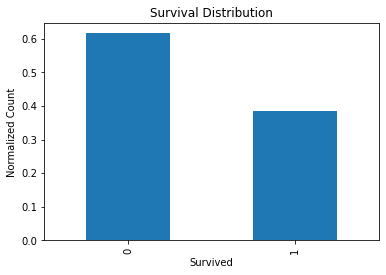

In [5]:
titanic['Survived'].value_counts(normalize=True).plot(kind='bar')
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Normalized Count')

 It seems most of the people ie more than 60% died as per record.

Text(0, 0.5, 'Normalized Count')

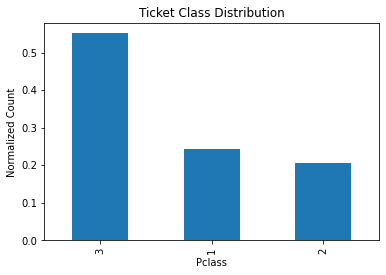

In [6]:
titanic['Pclass'].value_counts(normalize=True).plot(kind='bar')
plt.title('Ticket Class Distribution')
plt.xlabel('Pclass')
plt.ylabel('Normalized Count')

From this plot, we can see more than 50% passengers booked class 3 ticket.

Text(0, 0.5, 'Normalized Count')

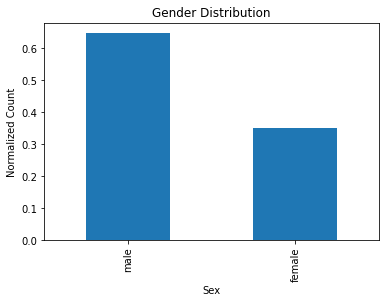

In [7]:
titanic['Sex'].value_counts(normalize=True).plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Normalized Count')

Count of Female passengers is almost twice of male passengers.

Text(0, 0.5, 'Normalized Count')

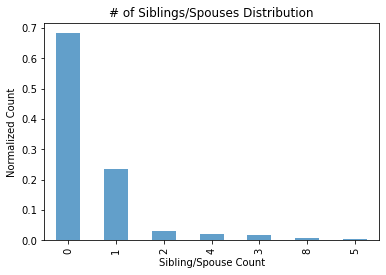

In [8]:
titanic['SibSp'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('# of Siblings/Spouses Distribution')
plt.xlabel('Sibling/Spouse Count')
plt.ylabel('Normalized Count')

Most of the passengers travelled alone, that is why most frequency came for Siblings/Spouse count 0.

Text(0, 0.5, 'Normalized Count')

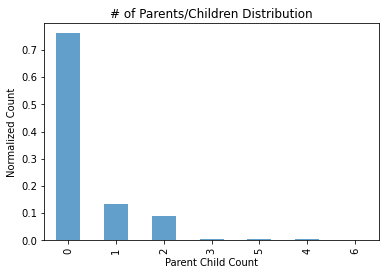

In [9]:
titanic['Parch'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('# of Parents/Children Distribution')
plt.xlabel('Parent Child Count')
plt.ylabel('Normalized Count')

Most of the people neither travelled with parents or children.

Text(0, 0.5, 'Frequency')

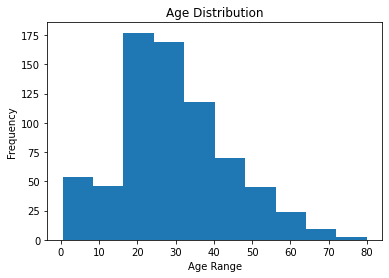

In [10]:
titanic['Age'].plot(kind='hist')
plt.title('Age Distribution')
plt.xlabel('Age Range')
plt.ylabel('Frequency')

As Age is continuous variable, we have used Histogram for this.

It seems, most of the people are from 18-30 years range. Before we predict missing age values, we will look into some more graphs.

Text(0, 0.5, 'Frequency')

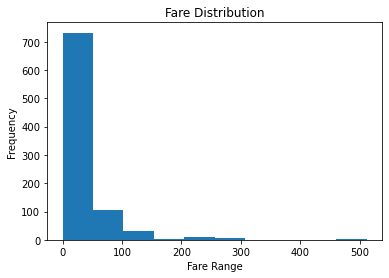

In [11]:
titanic['Fare'].plot(kind='hist')
plt.title('Fare Distribution')
plt.xlabel('Fare Range')
plt.ylabel('Frequency')

We can see most of the ticket price was within range of 50.

We have explored how the values for different features distributed. Lets see how Age variable depends on other features.

Text(0.5, 1.0, 'Age vs Female vs Class3')

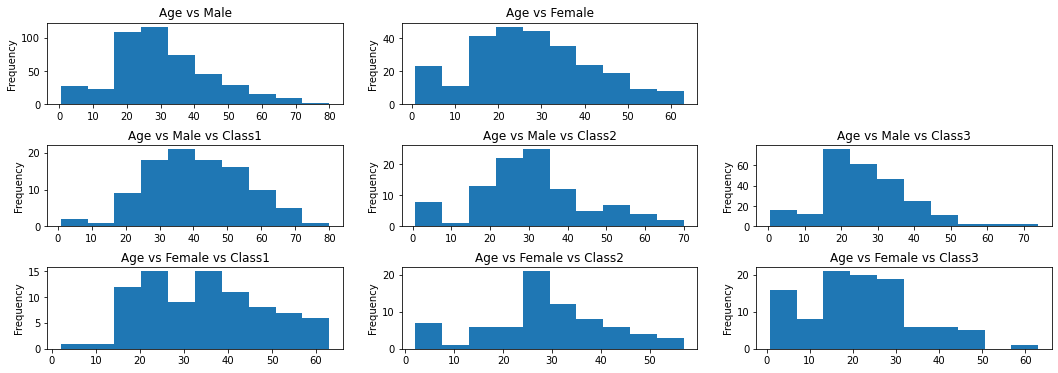

In [12]:
fig = plt.figure(figsize=(18,6))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((3,3), (0,0))
titanic['Age'][(titanic['Sex']=='male')].plot(kind='hist')
plt.title('Age vs Male')
plt.subplot2grid((3,3), (0,1))
titanic['Age'][(titanic['Sex']=='female')].plot(kind='hist')
plt.title('Age vs Female')
plt.subplot2grid((3,3), (1,0))
titanic['Age'][(titanic['Sex']=='male') & (titanic['Pclass']==1)].plot(kind='hist')
plt.title('Age vs Male vs Class1')
plt.subplot2grid((3,3), (1,1))
titanic['Age'][(titanic['Sex']=='male') & (titanic['Pclass']==2)].plot(kind='hist')
plt.title('Age vs Male vs Class2')
plt.subplot2grid((3,3), (1,2))
titanic['Age'][(titanic['Sex']=='male') & (titanic['Pclass']==3)].plot(kind='hist')
plt.title('Age vs Male vs Class3')
plt.subplot2grid((3,3), (2,0))
titanic['Age'][(titanic['Sex']=='female') & (titanic['Pclass']==1)].plot(kind='hist')
plt.title('Age vs Female vs Class1')
plt.subplot2grid((3,3), (2,1))
titanic['Age'][(titanic['Sex']=='female') & (titanic['Pclass']==2)].plot(kind='hist')
plt.title('Age vs Female vs Class2')
plt.subplot2grid((3,3), (2,2))
titanic['Age'][(titanic['Sex']=='female') & (titanic['Pclass']==3)].plot(kind='hist')
plt.title('Age vs Female vs Class3')

From the first row it looks like Age range varies differently based on gender. And in next two rows indicate Age range distribution differs not only based on gender but also with ticket class

We are going to calculate the median age of passengers who are grouped by ticket class and sex. And assign those median to null values present in those corresponding groups.

Text(0, 0.5, 'Survived Frequency (Normalized)')

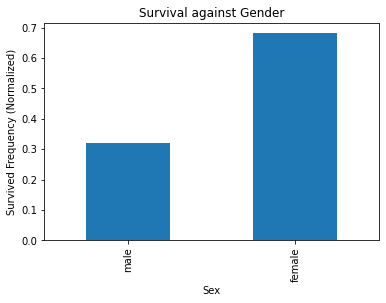

In [13]:
titanic['Sex'][titanic['Survived']==1].value_counts(normalize=True, ascending=True).plot(kind='bar')
plt.title('Survival against Gender')
plt.xlabel('Sex')
plt.ylabel('Survived Frequency (Normalized)')

It is clear that survival rate for men is much lower than womens'.

Text(0.5, 1.0, 'Ticket Class vs Survival')

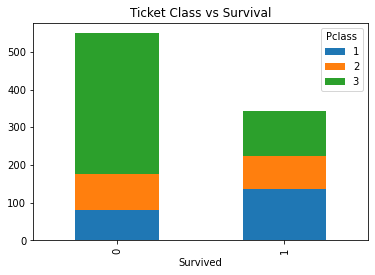

In [14]:
titanic.groupby(['Survived', 'Pclass']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Ticket Class vs Survival')

This plot shows that the people with first class ticket had more surviving count than dying while scenario was opposite for passengers of class 3.

Text(0, 0.5, 'Count')

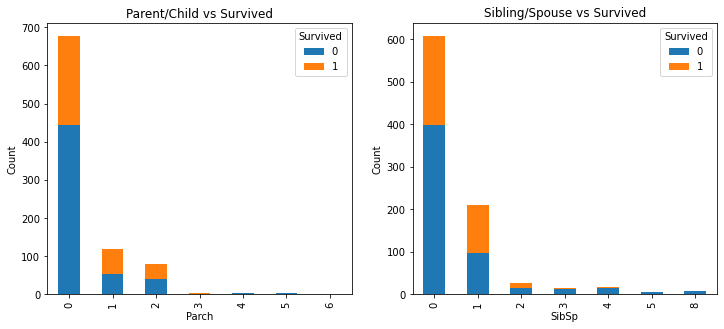

In [15]:
fig = plt.figure(figsize=(12,5))
plt.subplots_adjust(hspace=.5)

ax = plt.subplot2grid((1,2), (0,0))
titanic.groupby(['Parch', 'Survived']).size().unstack().plot(kind='bar', stacked=True, ax=ax)
plt.title('Parent/Child vs Survived')
plt.ylabel('Count')

ax = plt.subplot2grid((1,2), (0,1))
titanic.groupby(['SibSp', 'Survived']).size().unstack().plot(kind='bar', stacked=True, ax=ax)
plt.title('Sibling/Spouse vs Survived')
plt.ylabel('Count')

These two bar chart indicate if passenger accompanied by either soupse/siblings or parents/child, chances of survival were higher than who board the ship alone.

# Missing Value

In [16]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age and Cabin have a very high number of missing values.

Embarked has very low number of missing values.

In [17]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
# dropping all columns with missing values

titanic_col_del = titanic.dropna(thresh = 500, axis=1)
titanic_col_del.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
# shape before and after removing missing values

titanic.shape, titanic_col_del.shape

((891, 12), (891, 11))


A better way to deal with missing values without loss of information?

# Replacing with a new category/value

In [20]:
titanic['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [21]:
titanic['Cabin'].fillna(value='missing')

0      missing
1          C85
2      missing
3         C123
4      missing
        ...   
886    missing
887        B42
888    missing
889       C148
890    missing
Name: Cabin, Length: 891, dtype: object

In [22]:
titanic['Age'].fillna(value=999)

0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
       ...  
886     27.0
887     19.0
888    999.0
889     26.0
890     32.0
Name: Age, Length: 891, dtype: float64

In [23]:
## make a copy
titanic_replace = titanic.copy() 

# replace values
titanic_replace['Age'] = titanic_replace['Age'].fillna(value=999)
titanic_replace.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
(titanic['Cabin'].isnull()).astype('int')

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: Cabin, Length: 891, dtype: int32

In [25]:
titanic_replace['Cabin_na'] = (titanic['Cabin'].isnull()).astype('int')
titanic_replace.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_na
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


# Deleting Data points with missing values

In [26]:
# Age variable without missing values treatment
titanic['Age'].head(6)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
Name: Age, dtype: float64

In [27]:
# dropping all rows with missing values

titanic_row_del = titanic.dropna(axis=0)
titanic_row_del['Age'].head(6)

1     38.0
3     35.0
6     54.0
10     4.0
11    58.0
21    34.0
Name: Age, dtype: float64



Have deleted rows, if any one column/ feature has missing values in that row.

In [28]:
# shape before and after removing missing values

titanic.shape, titanic_row_del.shape

((891, 12), (183, 12))

Significant loss of information

Only three columns had missing values

# Deleting columns with missing values

In [29]:
## isnull with ratio 

(titanic.isnull().sum())/891

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [30]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Imputing Missing Values Using central tendency

In [31]:
# finding mean value
mean_val = titanic['Age'].mean()
mean_val

29.69911764705882

In [32]:
# making a copy
data_cleaned = titanic.copy() 

#imputing missing values
data_cleaned['Age'] = titanic['Age'].fillna(value = mean_val)
data_cleaned['Age'].isnull().sum()

0

In [33]:
data_cleaned.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [35]:
mode_val = titanic['Embarked'].mode()[0]
mode_val

'S'

In [36]:
data_cleaned['Embarked'] = titanic['Embarked'].fillna(value = mode_val)

# Dealing with Categorical Variables

In [37]:
#Categorical variables in the data
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [38]:
categorical_cols = ['Name', 'Sex', 'Ticket', 'Embarked']

In [39]:
#number of unique values
titanic[categorical_cols].nunique()

Name        891
Sex           2
Ticket      681
Embarked      3
dtype: int64

In [40]:
data_cleaned = data_cleaned.drop(['Name','Ticket','Cabin'], axis=1)

# Label Encoding

In [41]:
## map function

data_cleaned['Embarked'].map({'Q': 0, 'S': 1, 'C':2})

0      1
1      2
2      1
3      1
4      1
      ..
886    1
887    1
888    1
889    2
890    0
Name: Embarked, Length: 891, dtype: int64

In [42]:
data_cleaned['Embarked'] = data_cleaned['Embarked'].map({'Q': 0, 'S': 1, 'C':2})
data_cleaned['Embarked'].head()

0    1
1    2
2    1
3    1
4    1
Name: Embarked, dtype: int64

In [43]:
data_cleaned.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,1
1,2,1,1,female,38.0,1,0,71.2833,2
2,3,1,3,female,26.0,0,0,7.9250,1
3,4,1,1,female,35.0,1,0,53.1000,1
4,5,0,3,male,35.0,0,0,8.0500,1


In [44]:
## map function

data_cleaned['Sex'].map({'male': 1, 'female': 2})

0      1
1      2
2      2
3      2
4      1
      ..
886    1
887    2
888    2
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [45]:
data_cleaned['Sex'] = data_cleaned['Sex'].map({'male': 1, 'female': 2})
data_cleaned['Sex'].head()

0    1
1    2
2    2
3    2
4    1
Name: Sex, dtype: int64

In [46]:
data_cleaned.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,1
1,2,1,1,2,38.0,1,0,71.2833,2
2,3,1,3,2,26.0,0,0,7.9250,1
3,4,1,1,2,35.0,1,0,53.1000,1
4,5,0,3,1,35.0,0,0,8.0500,1


# Using relationship with other feature(s)

In [47]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [48]:
(titanic[['Name', 'Age']].loc[(titanic['Age'].isnull()>0)]).head(20)

,Name,Age
5,"Moran, Mr. James",NaN
17,"Williams, Mr. Charles Eugene",NaN
19,"Masselmani, Mrs. Fatima",NaN
26,"Emir, Mr. Farred Chehab",NaN
28,"O'Dwyer, Miss. Ellen ""Nellie""",NaN
29,"Todoroff, Mr. Lalio",NaN
31,"Spencer, Mrs. William Augustus (Marie Eugenie)",NaN
32,"Glynn, Miss. Mary Agatha",NaN
36,"Mamee, Mr. Hanna",NaN
42,"Kraeff, Mr. Theodor",NaN


# Outlier Treatment

In [49]:
#outlier detection for numerical data
num_columns = titanic.select_dtypes(exclude='object').columns.tolist()

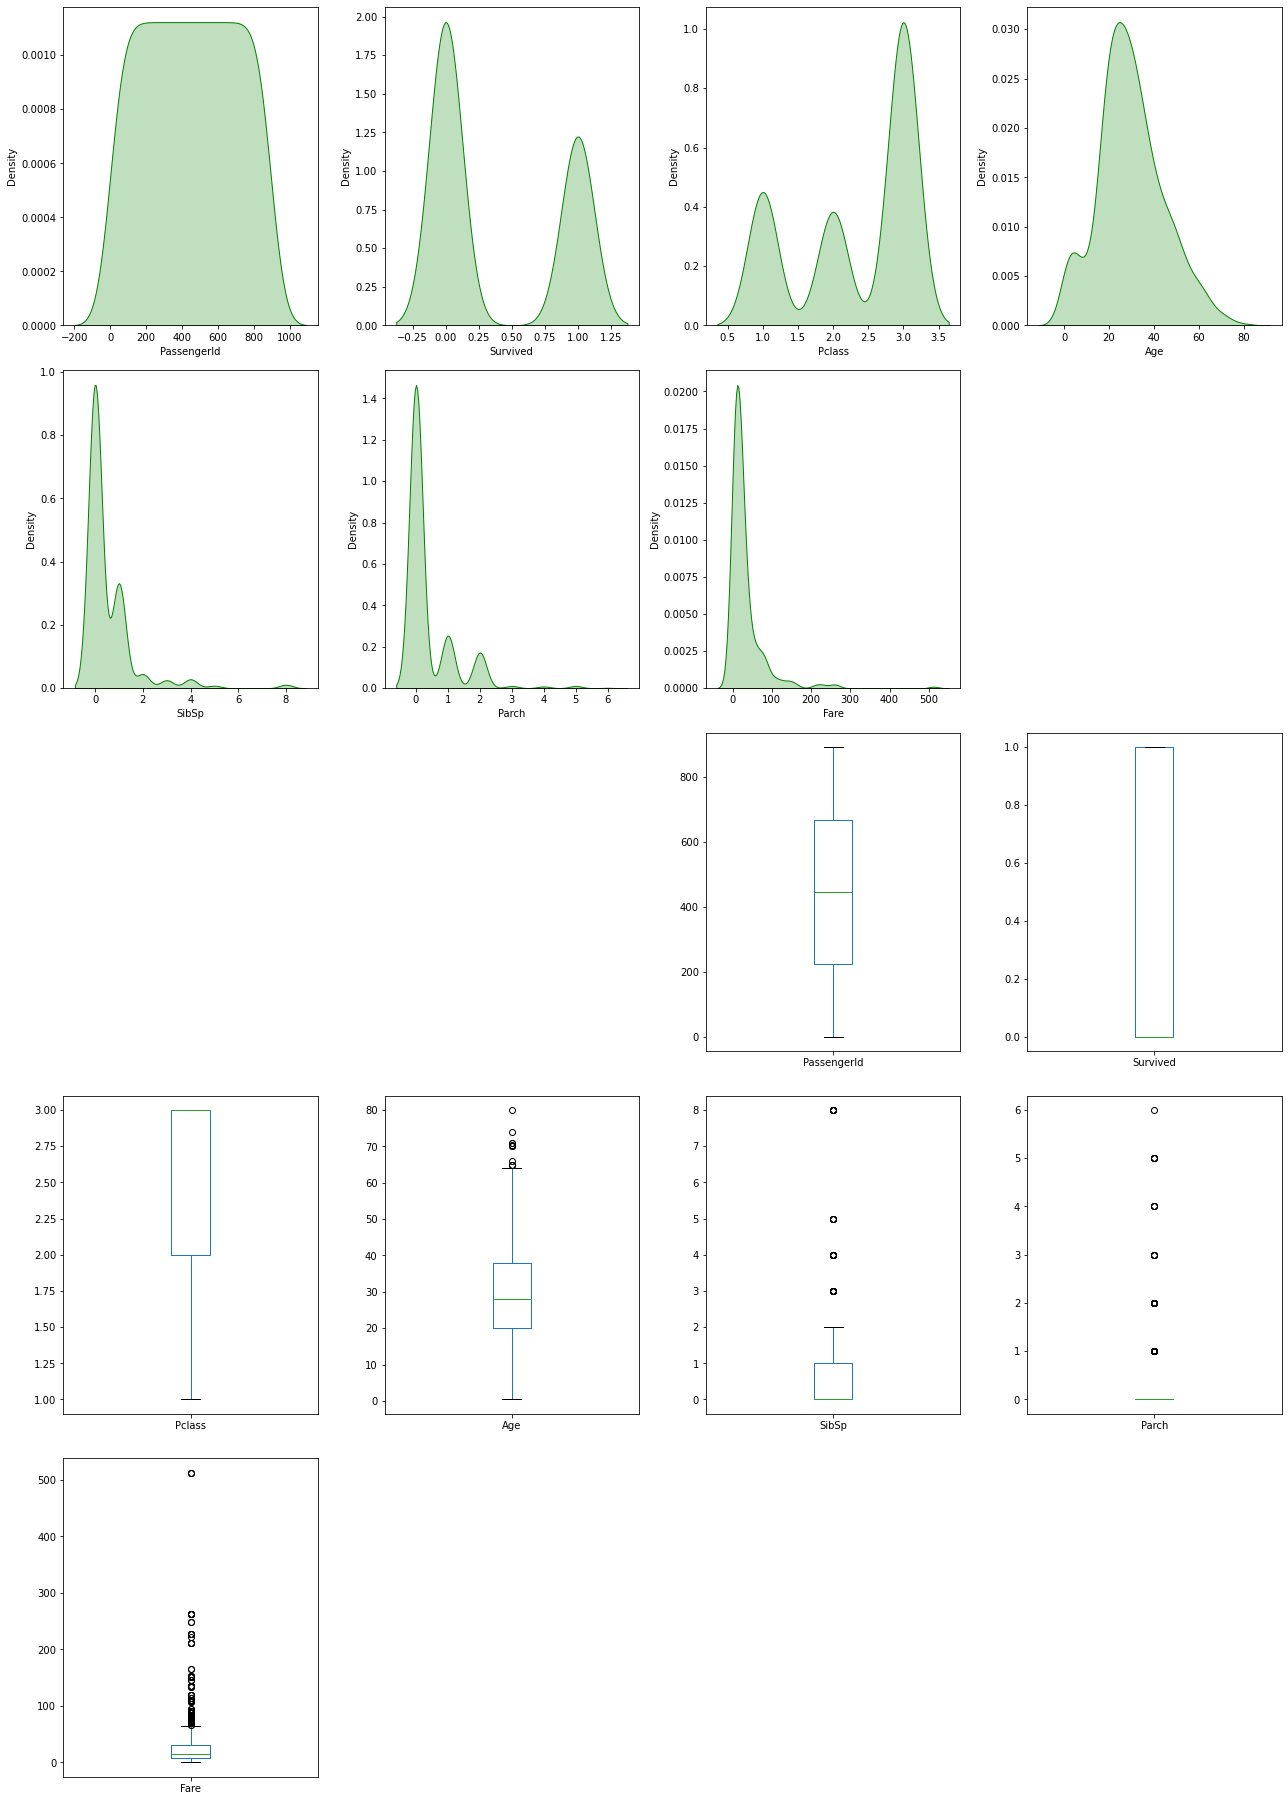

In [50]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(titanic[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    titanic[col].plot.box()
plt.tight_layout() 
plt.show()

In [51]:
titanic.drop(titanic[(titanic['Fare']<66)].index, inplace=True)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

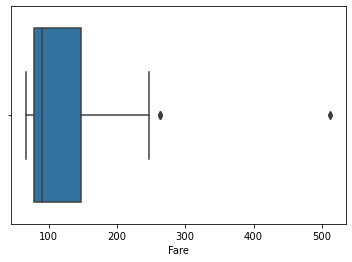

In [52]:
sns.boxplot(titanic['Fare'], orient= 'horizantal')

In [53]:
data_cleaned

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,1
1,2,1,1,2,38.000000,1,0,71.2833,2
2,3,1,3,2,26.000000,0,0,7.9250,1
3,4,1,1,2,35.000000,1,0,53.1000,1
4,5,0,3,1,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,1
887,888,1,1,2,19.000000,0,0,30.0000,1
888,889,0,3,2,29.699118,1,2,23.4500,1
889,890,1,1,1,26.000000,0,0,30.0000,2


In [54]:
data_cleaned['Embarked'].value_counts()

1    646
2    168
0     77
Name: Embarked, dtype: int64

In [55]:
data_cleaned['Sex'].value_counts()

1    577
2    314
Name: Sex, dtype: int64

In [56]:
data_cleaned['Sex'].value_counts()

1    577
2    314
Name: Sex, dtype: int64

# Segregating variables: Independent and Dependent Variables

In [57]:
#seperating independent and dependent variables
X = data_cleaned.drop(['Survived'],axis=1)
y =data_cleaned ['Survived'] 

In [58]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.000000,1,0,7.2500,1
1,2,1,2,38.000000,1,0,71.2833,2
2,3,3,2,26.000000,0,0,7.9250,1
3,4,1,2,35.000000,1,0,53.1000,1
4,5,3,1,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000,1
887,888,1,2,19.000000,0,0,30.0000,1
888,889,3,2,29.699118,1,2,23.4500,1
889,890,1,1,26.000000,0,0,30.0000,2


In [59]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

# Model Biulding

# 1. Logistic Regression

In [61]:
#Logistic regression and fit the model
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train,y_train)

LogisticRegression()

In [62]:
logistic_classifier.coef_

array([[-1.04663656e-04, -1.07694414e+00,  2.55622475e+00,
        -4.62174781e-02, -3.81755404e-01, -6.61639050e-02,
         1.75146551e-03, -2.72563420e-02]])

In [63]:
logistic_classifier.intercept_

array([0.0426497])

In [64]:
logistic_classifier.classes_

array([0, 1], dtype=int64)

In [65]:
logistic_classifier.predict_proba(X_test)

array([[0.88950344, 0.11049656],
       [0.88958762, 0.11041238],
       [0.92600318, 0.07399682],
       [0.07429269, 0.92570731],
       [0.4020266 , 0.5979734 ],
       [0.46401709, 0.53598291],
       [0.08262993, 0.91737007],
       [0.06058559, 0.93941441],
       [0.49025487, 0.50974513],
       [0.38431304, 0.61568696],
       [0.90909674, 0.09090326],
       [0.24755293, 0.75244707],
       [0.88201184, 0.11798816],
       [0.0753006 , 0.9246994 ],
       [0.04619792, 0.95380208],
       [0.22060364, 0.77939636],
       [0.85104186, 0.14895814],
       [0.70250103, 0.29749897],
       [0.91109631, 0.08890369],
       [0.69873447, 0.30126553],
       [0.60090063, 0.39909937],
       [0.03822311, 0.96177689],
       [0.88820714, 0.11179286],
       [0.46307057, 0.53692943],
       [0.29990701, 0.70009299],
       [0.12684982, 0.87315018],
       [0.89832674, 0.10167326],
       [0.293398  , 0.706602  ],
       [0.15372447, 0.84627553],
       [0.37553383, 0.62446617],
       [0.

In [66]:
logistic_classifier.score(X_test,y_test)

0.8100558659217877

In [67]:
#Predict for X dataset
y_pred = logistic_classifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [68]:
y_pred_df= pd.DataFrame({'actual': y_test,
                         'predicted_prob': y_pred}) 

In [69]:
y_pred_df 

,actual,predicted_prob
495,0,0
648,0,0
278,0,0
31,1,1
255,1,1
...,...,...
780,1,1
837,0,0
215,1,1
833,0,0


0.8022397891963109


Text(0, 0.5, 'True Positive Rate')

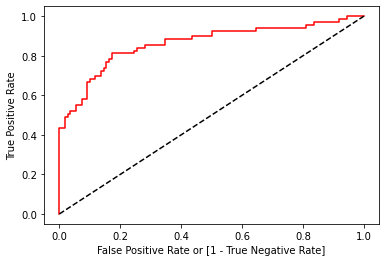

In [70]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, logistic_classifier.predict_proba (X_test)[:,1])

auc = roc_auc_score(y_test, y_pred)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [71]:
auc

0.8022397891963109

# 2.  Random forest model

In [72]:
from sklearn.ensemble import RandomForestRegressor
random_reg = RandomForestRegressor()
random_reg.fit(X_train, y_train)

RandomForestRegressor()

In [73]:
y_pred = random_reg.predict(X_test)

In [74]:
random_reg.score(X_train, y_train)
random_reg.score(X_test, y_test)

0.4515666403162055

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Survived', ylabel='Density'>

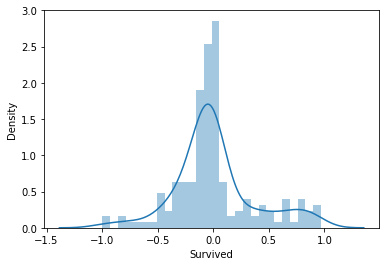

In [75]:
sns.distplot(y_test-y_pred)

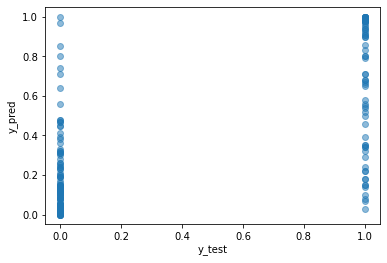

In [76]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [77]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.2401117318435754
MSE: 0.1299150837988827
RMSE: 0.36043735072670074


# 3.  KNN

In [78]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5) 

In [79]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [80]:
y_pred = knn_model.predict(X_test)

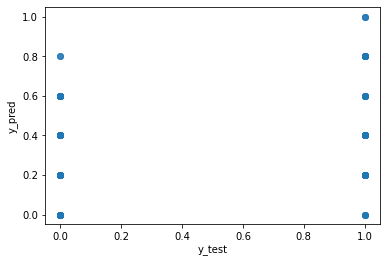

In [81]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [82]:
#Find the accuracy
knn_model.score(X_test,y_test)

0.0396732542819499

In [83]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.3932960893854749
MSE: 0.2274860335195531
RMSE: 0.4769549596340865


# 4. Decision Tree Regression

In [84]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [85]:
#creating the decision tree function
dt_model = DecisionTreeClassifier(random_state=10)

In [86]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [87]:
#checking the training score
dt_model.score(X_train, y_train)

1.0

In [88]:
#checking the validation score
dt_model.score(X_test, y_test)

0.7877094972067039

In [89]:
#predictions on validation set
dt_model.predict(X_test)

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1], dtype=int64)

In [90]:
dt_model.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [91]:
from sklearn import tree

In [92]:
!pip install graphviz

In [93]:
decision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=X_train.columns,max_depth=2,filled=True)

In [94]:
!dot -Tpng tree.dot -o tree.png

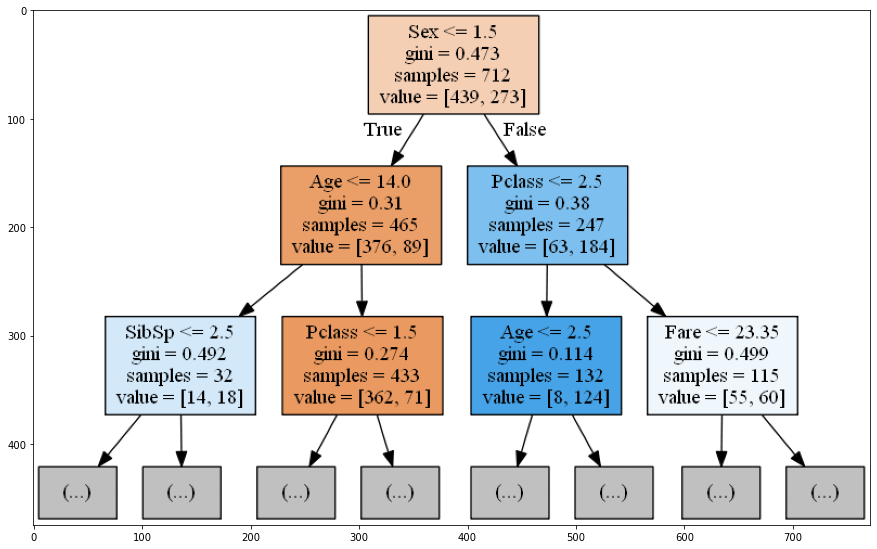

In [95]:
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

# 5.XG Boost model

In [96]:
!pip install xgboost

In [97]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [98]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [99]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [100]:
xgb.score(X_test,y_test)

0.8379888268156425

In [101]:
y_pred = xgb.predict(X_test)

In [102]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [103]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8379888268156425

# our final model will be XG Boost model as it has least RMSE value

In [104]:
data_cleaned

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,1
1,2,1,1,2,38.000000,1,0,71.2833,2
2,3,1,3,2,26.000000,0,0,7.9250,1
3,4,1,1,2,35.000000,1,0,53.1000,1
4,5,0,3,1,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,1
887,888,1,1,2,19.000000,0,0,30.0000,1
888,889,0,3,2,29.699118,1,2,23.4500,1
889,890,1,1,1,26.000000,0,0,30.0000,2


In [105]:
file_name = 'data_cleaned.xlsx' 
# saving the excel
data_cleaned.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [106]:
X = data_cleaned.drop(['Survived'],axis=1)
y =data_cleaned ['Survived'] 

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.02,random_state=0) 

In [108]:
final_model = xgb

In [109]:
pred_y=final_model.predict(X_test)
pred_y

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0])

In [110]:
final_model.score(X_test,y_test)

0.8333333333333334

In [111]:
from sklearn import metrics
print('Final_MAE:', metrics.mean_absolute_error(y_test, pred_y))
print('Final_MSE:', metrics.mean_squared_error(y_test, pred_y))
print('Final_RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred_y)))

Final_MAE: 0.16666666666666666
Final_MSE: 0.16666666666666666
Final_RMSE: 0.408248290463863
